# Problem Statement

*For this project, you must create a data set by simulationing a real world phenomenom of your choosing. You may pick any phenomenom you wish - you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenum, you should model and synthesize such data using Python. We suggest you use the numpy.random package for this purpose.*

## References

- https://en.wikipedia.org/wiki/Red_Hat
- https://searchsoftwarequality.techtarget.com/definition/histogram

### 1. Choose a real-world phenomenom that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

![Consulting](https://raw.githubusercontent.com/fionanealon/KPI/master/img/consulting2.jpeg)

Red Hat, Inc. is an American multinational software company providing open-source software products to the enterprise community. Red Hat provides storage, operating system platforms, middleware, applications, management products, and support, training, and consulting services.[Ref: Red Hat](https://en.wikipedia.org/wiki/Red_Hat)

I have based my research on a recent engagement delivered by the consulting services divison of Red Hat. This engagement was delivered by three resource types - consultant, architect and program manager.

The consulting services division have consistently been finding anomolies in one of their key performances indicators - the operating ratio. The operating ratio shows the efficiency of a company's management by comparing operating expense to net sales. The smaller the ratio, the greater the organization's ability to generate profit if revenues decrease. [Ref: Operating ratio](https://www.investopedia.com/terms/o/operatingratio.asp)

The consulting services divsiion has requested me to devise an algorithm to assist with a more accurate calculation on the operating ratio.

- Description of company and their business
- Continuously finding inconsistencies in cost volume profit calculations
- requested algorithm to assist with cvp analysisb
- Simpson

### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

**Hours**

*Hours* is the first variable of the data set. It is the number of hours that is worked by each employee working on the engagement.

**Bill rate**

*Bill rate* is the second variable of the data set. This is the value of what we bill the customer for each hour worked by each employee on the engagement.

**Total expenses**

*Total expenses* is the third variable of the data set. This is the value of expenses incurred by each employy working on the engagement.

**Resource type**

*Resource type* is the fourth variable of the data set. This is the classification of each employee working on the engagement - architect, consultant and program manager. Architects are the most qualified of the three resource types, followed by the consultant resource type and then the program manager resource type.

**Sales to expense ratio**

The Sales to expense ratio is the fifth variable of the data set. After some research, I have found that this is most interesting variable relating to my data set. Upon investigation on the of the problem, I find that *(hours)* multiplied by *(bill rate)* gives the total sales for the engagement. Total sales divided by total expense is the sales to expense ratio for the engagement.

Sales to expense is a key performance indicator. The aim of the consulting services should be to maximise the bill rate they are charging for their service and also to maximise the number of hours it is taking to deliver the services while minimising the total expenses incurred from delivering the services. Employees who deliver a higher number of hours at a higher bill rate but with the lowest possible total expenses will excel at this key performance indicator.

### 3. Synthesise/simulate a data set as closely matching their properties as possible.

![pandas logo](https://pandas.pydata.org/_static/pandas_logo.png)

![Iris flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)


- Iris Data set
- Great for developing alogrithms and classiifcation
- Pandas

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.neighbors as nei
import sklearn.model_selection as mod
import scipy.stats as ss
import matplotlib.pyplot as plt

# Set global parameter for using ggplot plotting style
plt.style.use('ggplot')
# Set the size of plots
plt.rcParams['figure.figsize'] = 14, 10

### Loading data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fionanealon/datasets/master/kpi.csv")

### Find the mean

In [4]:
df.groupby('resource').mean()

,total_expenses,bill_rate,hours
resource,,,
Architect,250.3,170.9,73.2
Consultant,329.4,148.7,277.6
Program-Manager,296.8,138.5,213.0


### Find the standard deviation

In [5]:
df.groupby('resource').std()

,total_expenses,bill_rate,hours
resource,,,
Architect,17.624484,19.051220,8.675558
Consultant,31.793980,16.124832,27.594735
Program-Manager,25.808557,15.689916,23.495549


### Simulate the data set

In [43]:
level1 = pd.DataFrame({'total_expenses': np.around(np.random.normal(250.3, 17.62, 50),2), 'bill_rate': np.around(np.random.normal(170.9, 19.05, 50),2), 'hours': np.around(np.random.normal(73.2, 8.67, 50),2)})

In [44]:
level2 = pd.DataFrame({'total_expenses': np.around(np.random.normal(329.4, 31.79, 50),2), 'bill_rate': np.around(np.random.normal(148.7, 16.12, 50),2), 'hours': np.around(np.random.normal(377.60, 27.59, 50),2)})

In [45]:
level3 = pd.DataFrame({'total_expenses': np.around(np.random.normal(296.8, 25.80, 50),2), 'bill_rate': np.around(np.random.normal(138.5, 15.68, 50),2), 'hours': np.around(np.random.normal(213, 23.49, 50),2)})

In [46]:
level1['sales_expense_ratio'] = (((level1['bill_rate']) * (level1['hours']))/ (level1['total_expenses']))

In [47]:
level2['sales_expense_ratio'] = (((level2['bill_rate']) * (level2['hours']))/ (level2['total_expenses']))

In [48]:
level3['sales_expense_ratio'] = (((level3['bill_rate']) * (level3['hours']))/ (level3['total_expenses']))

In [54]:
level1['resource_type'] = 'Architect'
level2['resource_type'] = 'Consultant'
level3['resource_type'] = 'Program Manager'
df = pd.concat([level1, level2, level3])
df = df.reset_index(drop=True)

In [53]:
df['hours'].min()

37.937106887281814

### Visualise

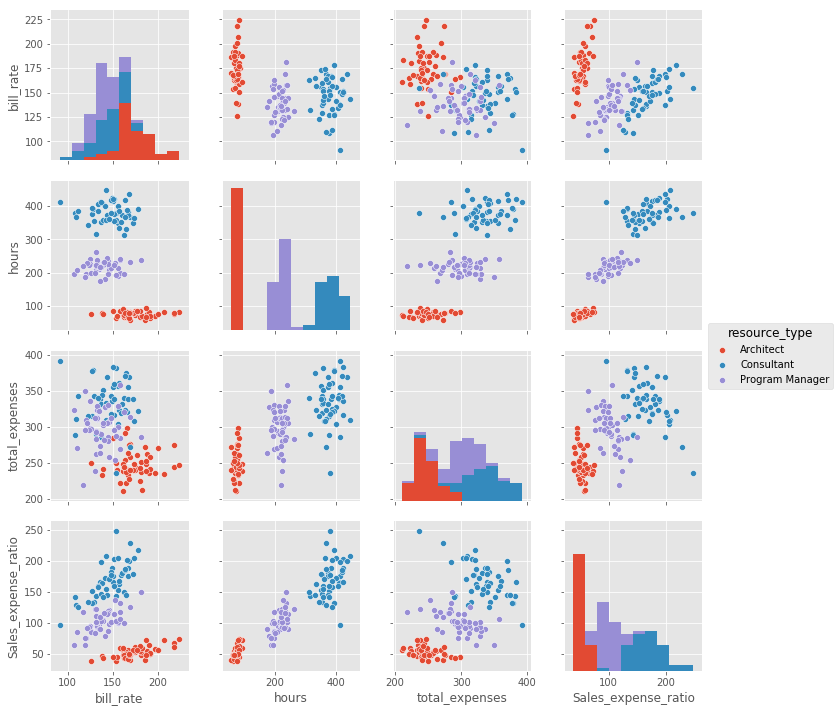

In [24]:
sns.pairplot(df, hue="resource_type")

**Seaborn**

Seaborn is a plotting library similiar to the matplotlib plotting package. The difference between seaborna nd matplotlib is that seaborn makes a lot of assumptions about how you would like it to visualize your data set. Seaborn is used in conjuction with pandas. 

In the above plots, I used pairplot to graphically demonstrate the relationship between the variables of my simualation. Pairplot takes the dataframe from pandas and it produces a grid of 4 x 4 plots. The first column of columns plots total expenses against each of the other variables, the second column of colums plots bill rate against each of the other variables, the third column of columns plots hours against each of the other variables and the fourth column of columns plots operating ratio against each of the other variables. And likewise with the rows.

The idea of these 4 x 4 grid plots is to compare all the numeric values within the data set against each other. It ignores the classification variable resource type as this is not a numeric value. A legend has been provided by pairplot to show which data points relate to each of the resouce types.


**Bill rate histogram**

A histogram is a plot used for plotting one dimensional data. The bill rate histogram is plotting the bill rate values on the x axis and provides a graphical representation of their distribution, a normal distribution.  The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. [Ref: Histogram](https://searchsoftwarequality.techtarget.com/definition/histogram) The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) bill rate appear to peak around the mean of 170. The architect bill rtae has a standard deviatio of 19.05. This is the largest standard deviation of the three resource types. Because of this, the red data on the histogram has a flatter shape as we can expect larger swings in the bill rate charged for architect hours. The blue (consultant) bill rate appear to peak around the mean of 148. The consulatnt bill rate has a standard deviation of 16.12. This standard deviation is in the mid range of the three resource types. Because of this, the shape of the blue data on the histogram is in the mid range and we expect swings in the mid range for the bill rate charged for consulatant hours. The purple (purple) bill rate appear to peak around the mean of 138. The program manager bill rate has a standard deviation of 15.68. This is the lowest standard deviation of the three resource types. Because of this, the purple data on the histogram has a higher shape as we can expect lower swings in the bill rate charged for program manager hours.

**Bill rate and hours scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the hours values on the y axis range from around 50 up to around 440. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding hours value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. There apear to have a bill rate ranging from 125 to 250 and there apprears to be deliveries fewer than 100 hours for architects. The purple (program manager) data points also appear to be in their own group. Program managers have a bill rate of around 100 to 175 and there appears to be deliveries of between 150 and 250 hours for program managers. The blue (consultant) data points also appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have deliveries of between 300 and 400 hours. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 


**Bill rate and total expenses scatter plot** 

The bill rate and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the total expenses values on the y axis range from around 211 up to around 416. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. Although the red (architect) data points appear to be in their own group, this group is not as definitive as other plots. There does appear to be some crossover with other resource types. They apear to have a bill rate ranging from 125 to 250 and they appear to have total expenses ranging from 210 to 280 . The purple (program manager) data points again appear to be in their own group but the grooup is not as definite. Program managers have a bill rate of around 100 to 175 and total expenses of 225 to 350. There apears to be quite a lot of variation in the blue (consultant) data points and it would be difficult to assign these data points into one group. They have a bill rate of around 110 to 180 and appear to have total expenses 250 to 425. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 

**Bill rate and sales expense ratio scatter plot** 

The bill rate and sales expense ratio plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The bill rate values on the x axis range from 88 up to about 225 and the sales expense ratio values on the y axis range from around 37 up to around 255. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. They apear to have a bill rate ranging from 125 to 250 and they appear to have sales expense ratio ranging from 37 to 75. The purple (program manager) data points again appear to be in their own group. Program managers have a bill rate of around 100 to 175 and a sales expense ratio of 60 up to 150. The blue (consultant) data points appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have a sales expense ratio of 100 to 250. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting sales expense would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting sales expense ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting sales expense ratio are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 


**Hours and bill rate scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and bill rate values on the y axis range from 88 up to about 225. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding bill rate value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. There apear to have a bill rate ranging from 125 to 250 and there apprears to be deliveries fewer than 100 hours for architects. The purple (program manager) data points also appear to be in their own group. Program managers have a bill rate of around 100 to 175 and there appears to be deliveries of between 150 and 250 hours for program managers. The blue (consultant) data points also appear to be in their own group. They have a bill rate of around 110 to 180 and appear to have deliveries of between 300 and 400 hours. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 

**Hours histogram**

A histogram is a plot used for plotting one dimensional data. The hours histogram is plotting the hours values on the x axis and provides a graphical representation of their distribution, a normal distribution.  The histogram uses bins to show the frequency of data in successive numerical intervals of equal size. [Ref: Histogram](https://searchsoftwarequality.techtarget.com/definition/histogram) The areas in which the bins of the histogram peak shows the mean of the data. The red (architect) hours appear to peak around the mean of 73. The architect hours have a standard deviation of 8.67. This is the lowest standard deviation of the three resource types. Because of this, the red data on the histogram has the highest peak as we can expect the lowest swings in the hours delivered for architect hours. The purple (purple) hours appear to peak around the mean of 213. The program manager bill rate has a standard deviation of 23.49. This hours standard deviation is in the mid range of the three resource types so we can expect swings in hours in the mid range. The blue (consultant) hours appear to peak around the mean of 277. The consultant bill rate has a standard deviation of 27.59.  This is the largest standard deviation of the three resource types. Because of this, the red data on the histogram has a flatter shape as we can expect larger swings in the hours delivered for architect hours. 

**Hours and total expenses scatter plot** 

The bill rate and hours plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axis. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and total expenses values on the y axis range from 210 up to about 400. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. They apear to have a hours deliveries ranging from 125 to 250 and total expenses appear to range from 210 to 300. The purple (program manager) data points appear to have deliveries of between 150 and 250 hours and have total expenses of 215 to 360. The blue (consultant) data points also appear to be in their own group. They have deliveries of between 300 and 400 hours and total expenses of 240 to 400. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total total expenses will be quite low. Program managers take care of the day to day management of the project, they are not required to deliver as many hours as consultants so there hours and resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group. Their hours deliveries and resulting total expenses are the highest of the group.

**Hours and sales expense ratio scatter plot** 

The hours and sales expense ratio plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The hours values on the x axis range from around 50 up to around 440 and the sales expense ratio values on the y axis range from around 211 up to around 416. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's hours value on the x axis and it's corresponding sales expense value on the y axis. The data point is placed on the plot where the two values meet. The red (architect) data points appear to be in their own group. TTey apear to have a hours deliveries ranging from 125 to 250 and they appear to have sales expense ratio ranging from 37 to 75. The purple (program manager) data points are also in their own group. The purple (program manager) data points appear to have deliveries of between 150 and 250 hours and a sales expense ratio of 60 up to 150. The blue (consultant) data points are seem to be in their own group. They have deliveries of between 300 and 400 hours and appear to have a sales expense ratio of 100 to 250. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses and sales expense ratio would be quite low. Program managers take care of the day to day management of the project, they are not reuired to deliver as many hours as consulatnts so their hours and resulting total expenses and sales expenses ratio would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses and sales expenses ratio are the highest of the three groups. 

**Total expenses and bill rate scatter plot** 

The bill rate and total expenses plot has been plotted on a scatter plot. A scatter plot is a graphical representation of the values of two variables which are plotted on the x and y axix. The resulting data points reveal any correlation present. The  total expenses values on the x axis range from around 211 up to around 416 and the bill rate values on the y axis range from 88 up to about 225. Every dot on the plot represents a row of the dataframe. For each point on the dataframe, you can find it's bill rate value on the x axis and it's corresponding total expenses value on the y axis. The data point is placed on the plot where the two values meet. Although the red (architect) data points appear to be in their own group, this group is not as definitive as other plots. There does appear to be some crossover with other resource types. They apear to have a bill rate ranging from 125 to 250 and they appear to have total expenses ranging from 210 to 280 . The purple (program manager) data points again appear to be in their own group but the grooup is not as definite. Program managers have a bill rate of around 100 to 175 and total expenses of 225 to 350. There apears to be quite a lot of variation in the blue (consultant) data points and it would be difficult to assign these data points into one group. They have a bill rate of around 110 to 180 and appear to have total expenses 250 to 425. The architect resource type is the most knowledgable of the three resource types. They are generally deployed to offer mentoring to consultants and do not perform the day to day operations of the project and therfore hours deliveries for this resouce type would be quite low and resulting total expenses would be quite low. Program managers take care of the day to day management of the project, they are not as qualified as the consultants and architects so a lower bill rate would be charged for their hours. Their hours deliveries would be in the mid range so their resulting total expenses would be in the mid range. Consultants perform most of the day to day operations of the project so as expected their hours deliveries are the highest of the group and resulting total expenses are the highest. As they are more qualified than the program mangers but less qualified than the architects their bill rates are in the middle range of the group. 




### 3. Synthesise/simulate a data set as closely matching their properties as possible.

### Inputs and outputs

In [28]:
inputs = df[['Sales_expense_ratio', 'bill_rate', 'hours', 'total_expenses']]
outputs = df['resource_type']

### Classifier

In [29]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [30]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Predict

In [31]:
df.loc[121]

bill_rate                       132.78
hours                           222.42
total_expenses                  311.93
Sales_expense_ratio            94.6781
resource_type          Program Manager
Name: 121, dtype: object

In [33]:
knn.predict([[132.78, 222.42, 311.93, 94.67]])

array(['Program Manager'], dtype=object)

In [34]:
(knn.predict(inputs) == outputs).sum()

150

In [35]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [36]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
(knn.predict(inputs_test) == outputs_test).sum()

50

### Algorithmic bias

In [ ]:
df.std()

In [ ]:
df.groupby('resource_type').std()

In [ ]:
df.groupby('resource_type').var()

In [ ]:
x = np.linspace(-10.0, 10.0, 1000)

plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=1.0), label="$\mu = 76.23, \sigma = 8.73$", c='b', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 2.0, scale=1.0), label="$\mu = 435.04, \sigma = 20.85$", c='r', alpha=0.6, lw=3.0)
plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=2.0), label="$\mu = 342.72, \sigma = 18.15$", c='g', alpha=0.6, lw=3.0)

plt.title("Normal distribution for different $\mu$ and $\sigma$")
plt.legend();

In [ ]:
x = np.linspace(-3.0, 3.0, 1000)
y = ss.norm.pdf(x, loc= 0.0, scale=1.0)

xseg = x[np.logical_and(-1.0 < x,  x < 1.4)]
yseg = y[np.logical_and(-1.0 < x,  x < 1.4)]

plt.plot(x, y, color='k', alpha=0.5)
plt.fill_between(xseg, yseg, color='b', alpha=0.5)
plt.axvline(x=-1.0, color='grey', linestyle=':')
plt.axvline(x= 1.4, color='grey', linestyle=':')

plt.text(0.2, 0.15,
         r'$P (a \leq X \leq b) = \int_a^b \frac{1}{\sqrt{2\pi\sigma^2} } e^{ -\frac{(x-\mu)^2}{2\sigma^2} } \, dx$',
         horizontalalignment='center', size=17)

plt.axhline(y= 0.0, color='black', linestyle='-')

plt.title("Probability of $x$ between $a$ and $b$");